In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from Chandra.Time import DateTime
from Ska.Matplotlib import plot_cxctime
import tables

In [2]:
from netCDF4 import Dataset

In [3]:
def compare_g13_14_15_proton_rates(times, t_primary, t_secondary, channel):
    fig = plt.figure(figsize=(12, 6))
    
    okp13 = t_primary['satellite'] == 13
    oks13 = t_secondary['satellite'] == 13
    
    okp14 = t_primary['satellite'] == 14
    oks14 = t_secondary['satellite'] == 14
    
    okp15 = t_primary['satellite'] == 15
    oks15 = t_secondary['satellite'] == 15
    
    colname = f"median_{channel}"
    
    # GOES 13
    plot_cxctime(times[okp13], t_primary[colname][okp13], color='moccasin',
                 marker='o', ms='2', linestyle='None', label='G13 primary')
    plot_cxctime(times[oks13], t_secondary[colname][oks13], color='gold',
                 marker='o', ms='2', linestyle='None', label='G13 secondary')
    # GOES 14
    plot_cxctime(times[okp14], t_primary[colname][okp14], color='indianred',
                 marker='o', ms='2', linestyle='None', label='G14 primary')
    plot_cxctime(times[oks14], t_secondary[colname][oks14], color='salmon',
                 marker='o', ms='2', linestyle='None', label='G14 secondary')
    # GOES 15
    plot_cxctime(times[okp15], t_primary[colname][okp15], color='C0',
                 marker='o', ms='2', linestyle='None', label='G15 primary')
    plot_cxctime(times[oks15], t_secondary[colname][oks15], color='lightblue',
                 marker='o', ms='2', linestyle='None', label='G15 secondary')
    plt.yscale('log')
    plt.legend()
    plt.ylabel('Protons / cm2-s-sr-MeV')

    ax = fig.axes[0]
    plt.text(0.2, 0.7, channel,
             transform=ax.transAxes, fontsize=30, color='k');
    plt.grid()

## Long term comparison of the primary and secondary GOES proton fluxes (2015-2020 prior to GOES-16)

In [4]:
# GOES primary data between 2015-05-30 and 2020-01-22, daily medians for P4, P5, P6
t_primary = Table.read('goes-2015-05-30-2020-01-22.dat', format='ascii')

# GOES secondary data between 2015-05-30 and 2020-01-22, daily medians for P4, P5, P6
t_secondary = Table.read('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')

times = DateTime(t_primary['time_mjd'], format='mjd').secs

In [5]:
times = DateTime(t_primary['time_mjd'], format='mjd').secs

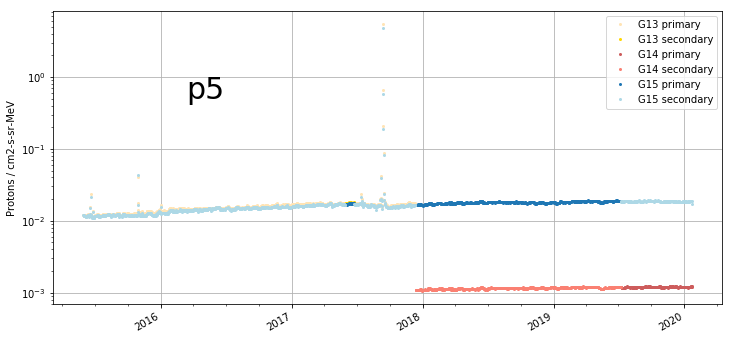

In [6]:
compare_g13_14_15_proton_rates(times, t_primary, t_secondary, 'p5');

## Comparison of GOES-13 (primary), GOES-15 (secondary) and GOES-14 data for 2017 flare ##

* GOES-13 and GOES-15 archive can be found at the following URL: https://satdat.ngdc.noaa.gov/sem/goes/data/full/2017/09.
* GOES-14 data for the 2017 flaring period were received from L. Parker.
* GOES_14 data starting on Dec 2017 are also available at the linked NOAA archive.

In [7]:
path1 = "/home/malgosia/git/mtanb/"
path2 = "/home/malgosia/git/mtanb/g16-hrc-proxy/2017-g14-data/"

g13_10_file = "g13_epead_p27e_32s_20170910_20170910.nc"
nc13_10 = Dataset(f"{path1}/{g13_10_file}", "r", format="NETCDF4")

g13_11_file = "g13_epead_p27e_32s_20170911_20170911.nc"
nc13_11 = Dataset(f"{path1}/{g13_11_file}", "r", format="NETCDF4")

g15_10_file = "g15_epead_p27e_32s_20170910_20170910.nc"
nc15_10 = Dataset(f"{path1}/{g15_10_file}", "r", format="NETCDF4")

g15_11_file = "g15_epead_p27e_32s_20170911_20170911.nc"
nc15_11 = Dataset(f"{path1}/{g15_11_file}", "r", format="NETCDF4")

g14_10_file = "g14_epead_p27e_32s_20170910_20170910.nc"
nc14_10 = Dataset(f"{path2}/{g14_10_file}", "r", format="NETCDF4")

g14_11_file = "g14_epead_p27e_32s_20170911_20170911.nc"
nc14_11 = Dataset(f"{path2}/{g14_11_file}", "r", format="NETCDF4")

g14_Dec_2017_file = "g14_epead_p27e_32s_20171201_20171201.nc"
nc14_Dec_2017 = Dataset(f"{path1}/{g14_Dec_2017_file}", "r", format="NETCDF4")

g14_Feb_2020_file = "g14_epead_p27e_32s_20200229_20200229.nc"
nc14_Feb_2020 = Dataset(f"{path1}/{g14_Feb_2020_file}", "r", format="NETCDF4")

In [8]:
nc14_10.variables['P5E_UNCOR_FLUX']

<class 'netCDF4._netCDF4.Variable'>
float32 P5E_UNCOR_FLUX(record)
    description: Average flux of 63.1 MeV protons from the B detector that faces either East or West depending on the yaw flip of the satellite with no correction applied to remove higher-energy proton contamination 
    long_label: protons-5-B(63.1 MeV) flux
    short_label: p5B fx
    plot_label: p5B(63.1 MeV)
    lin_log: log
    units: p/(cm^2 s sr MeV)
    format: E10.4
    nominal_min: 0
    nominal_max: 1.0e5
    missing_value: -99999
unlimited dimensions: record
current shape = (2637,)
filling off

In [9]:
nc14_10.variables['time_tag']

<class 'netCDF4._netCDF4.Variable'>
float64 time_tag(record)
    long_name: Date and time for each observation (end-time of accumulation as stamped by spacecraft)
    units: milliseconds since 1970-01-01 00:00:00.0 UTC
    calendar: Gregorian
unlimited dimensions: record
current shape = (2637,)
filling off

__A factor for conversion from miliseconds since 1970-01-01 00:00:00.0 UTC to seconds since 1998-01-01 00:00:00.0 UTC__

In [10]:
day_01_01_1970_now = DateTime('1970-01-01T00:00:00.0').relday

In [11]:
day_01_01_1998_now = DateTime('1998-01-01T00:00:00.0').relday

In [12]:
dday = day_01_01_1998_now - day_01_01_1970_now

__Plot (the old) P5 channel__

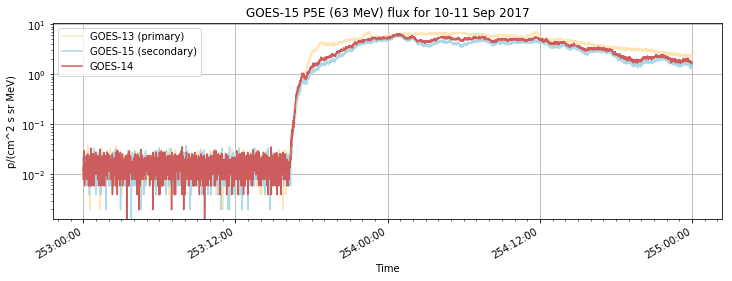

In [13]:
plt.figure(figsize=(12, 4))

times = np.array(nc13_10['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc13_10['P5E_UNCOR_FLUX'], color='moccasin', label='GOES-13 (primary)')
times = np.array(nc13_11['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc13_11['P5E_UNCOR_FLUX'], color='moccasin', label='')

times = np.array(nc15_10['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc15_10['P5E_UNCOR_FLUX'], color='lightblue', label='GOES-15 (secondary)')
times = np.array(nc15_11['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc15_11['P5E_UNCOR_FLUX'], color='lightblue', label='')

times = np.array(nc14_10['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc14_10['P5E_UNCOR_FLUX'], color='indianred', label='GOES-14')
times = np.array(nc14_11['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc14_11['P5E_UNCOR_FLUX'], color='indianred', label='')

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('p/(cm^2 s sr MeV)')
plt.title('GOES-15 P5E (63 MeV) flux for 10-11 Sep 2017')
plt.grid()
plt.legend();

__Figure:__ Daily medians plotted based on the pre-GOES-16 data provided by NOAA using the old interface, used to compute the HRC proxy prior to Feb 2020.

  * GOES-14 rates on 10-Sep-2017 (quiet period preceeding the flare) are at the level of __10^-2__ p / cm^2-s-sr-MeV.
  * GOES-14 rates in the quiet time period, starting at the end of 2017, were seen at the level of __10^-3__ p / cm^2-s-sr-MeV and resulted in an order of mag drop in HRC proxy in July 2019.
  * Confusingly, daily medians on Dec 01, 2017 and Feb 29, 2020 computed from from \*.nc files archived on NOAA webpage show now proton rates at level of 10^-2 p / cm^2-s-sr-MeV that is consistent with GOES-13 and GOES-15 (P5E_UNCOR_FLUX).
  * This ~order of magnitude difference between our recorded and archive GOES-14 data for quiet period is still not understood

In [14]:
median_Dec_2017 = np.median(nc14_Dec_2017['P5E_UNCOR_FLUX'])
median_Feb_2020 = np.median(nc14_Feb_2020['P5E_UNCOR_FLUX'])

In [15]:
median_Dec_2017, median_Feb_2020

(0.0157356, 0.0196696)

## Replan Central archive

In [16]:
h5_file = "/proj/sot/ska/data/arc3/hrc_shield.h5"

In [17]:
with tables.open_file(h5_file, mode='r',
                      filters=tables.Filters(complevel=5, complib='zlib')) as h5:
    table = h5.root.data

In [18]:
h5 = tables.open_file(h5_file, mode='r')
table = h5.root.data
sat = table.col('satellite')
secs = table.col('time')
p4 = table.col('p4')
p5 = table.col('p5')
p6 = table.col('p6')
p7 = table.col('p7')
p9 = table.col('p9')
hrc_shield = table.col('hrc_shield')
h5.close()

### Dominant proton channel for HRC shield proxy

In [19]:
n1 = 300000
n2 = 26000
n3 = 25000

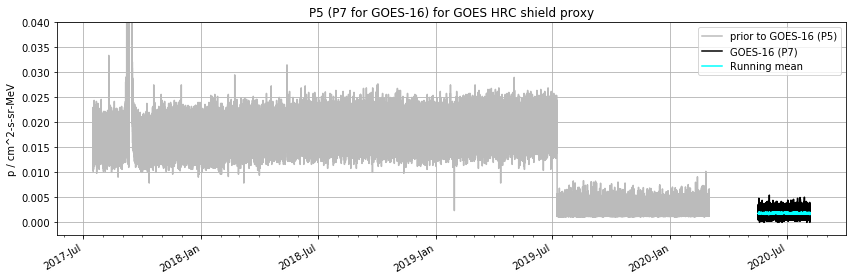

In [20]:
plt.figure(1, figsize=(12, 4))

bad = hrc_shield[-n1:-n2] < 0.1
x = secs[-n1:-n2][~bad]
y = p5[-n1:-n2][~bad]
plot_cxctime(x, y, color="#bbbbbb", label='prior to GOES-16 (P5)')

bad = hrc_shield[-n3:] < 0.1
x = secs[-n3:][~bad]
y = p7[-n3:][~bad]
plot_cxctime(x, y, color='k', label='GOES-16 (P7)')

# 60 x 5 min = 300 min = 5 hours
N = 60
y_mean = np.convolve(y, np.ones((N,))/N, mode='valid')
plot_cxctime(x[N - 1:], y_mean, color='cyan', label='Running mean')

plt.grid()
plt.ylim(-0.0025, 0.04)
plt.title('P5 (P7 for GOES-16) for GOES HRC shield proxy')
plt.ylabel('p / cm^2-s-sr-MeV')
plt.legend()
plt.tight_layout()

### GOES HRC shield proxy

In [21]:
n_lookback = 300000

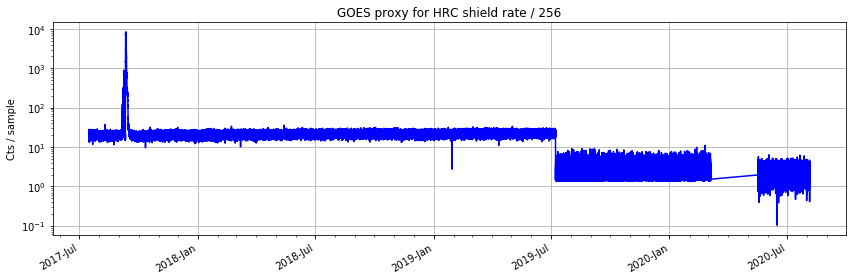

In [22]:
bad = hrc_shield[-n_lookback:] < 0.1
x = secs[-n_lookback:][~bad]
y = hrc_shield[-n_lookback:][~bad]

plt.figure(1, figsize=(12, 4))
ticks, fig, ax = plot_cxctime(x, y)
ax.set_yscale('log')
plt.grid()
plt.title('GOES proxy for HRC shield rate / 256')
plt.ylabel('Cts / sample')
plt.tight_layout()